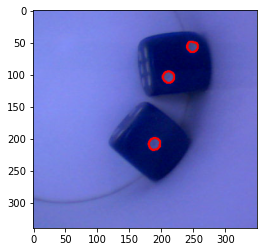

In [32]:
import cv2
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive
from glob import glob
%matplotlib inline 

# camera = cv2.VideoCapture(0)
# _, _ = camera.read()


##TU JEST KOD, KTÓRY W ZAŁOŻENIU MA DZIAŁAĆ 
##Następne komórki to raczej playground
#TODO: dobrac min/max rozmiar oczka
#TODO: dobrać wycięcie obrazka


l = glob("rozproszone/*.jpg")
img = cv2.imread(l[0])
img = img[110:-30,230:-60]
_ ,_ ,red = cv2.split(img)
_, threshh = cv2.threshold(red, 50, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(threshh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)

for c in contours:
    (_,_,w,h) = cv2.boundingRect(c)
    if 100<cv2.contourArea(c)<=300  and 0.8<w/h<1.2:  
        cv2.drawContours(img, [c], -1, (0, 0, 255), 2)
        
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))


In [28]:
#tool do znajdowania odpowiedniego wycięcia

def getThresh(img,lower=20,a=1,b=-1,c=1,d=-1):    
    img = cv2.imread(img)
    img = img[a:b,c:d]
    plt.imshow(img)
    
    # _,_,red = cv2.split(img) # a w zasadzue chyba red XD
    # ret, threshh = cv2.threshold(red, lower, 255, cv2.THRESH_BINARY)
    #plt.imshow(threshh)
    
interactive(getThresh,img=glob("rozproszone/*.jpg"),lower=(0,255,1),
            a = (-200,200,1),
            b = (-200,0,1),
            c = (0,200,1),
            d = (-200,0,1)
            
            
            )

interactive(children=(Dropdown(description='img', options=('rozproszone/269832635_211330037861355_889606692101…

In [29]:
def getAllParams(img,lowerTh=20):
    img = cv2.imread(img)
    img = img[110:-30,230:-60]
    _,_,red = cv2.split(img) 
    _, threshh = cv2.threshold(red, lowerTh, 255, cv2.THRESH_BINARY)
    contours,_ = cv2.findContours(threshh, cv2.RETR_LIST, cv2.CHAIN_APPROX_NONE)
    
    for c in contours:
        (_,_,w,h) = cv2.boundingRect(c)
        if 100<cv2.contourArea(c)<=300  and 0.8<w/h<1.2:  
            cv2.drawContours(img, [c], -1, (0, 0, 255), 2)
            
    plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
    
interactive(getAllParams,img=glob("rozproszone/*.jpg"),lowerTh=(0,255,1))


interactive(children=(Dropdown(description='img', options=('rozproszone/269832635_211330037861355_889606692101…